In [ ]:
pwd

'/content'

In [ ]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import seaborn as sns
# Plotting library
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline
import pandas as pd
from numpy import inf

In [ ]:
def plotData(x, y):
    """
    Plots the data points x and y into a new figure. Plots the data 
    points and gives the figure axes labels of population and profit.
    
    Parameters
    ----------
    x : array_like
        Data point values for x-axis.

    y : array_like
        Data point values for y-axis. Note x and y should have the same size.
    
    Instructions
    ------------
    Plot the training data into a figure using the "figure" and "plot"
    functions. Set the axes labels using the "xlabel" and "ylabel" functions.
    Assume the population and revenue data have been passed in as the x
    and y arguments of this function.    
    
    Hint
    ----
    You can use the 'ro' option with plot to have the markers
    appear as red circles. Furthermore, you can make the markers larger by
    using plot(..., 'ro', ms=10), where `ms` refers to marker size. You 
    can also set the marker edge color using the `mec` property.
    """
    fig = pyplot.figure()  # open a new figure
    
    #MEC stands for Mark Edge Color to define the Color of the broder of the data point for easy visibility     
    # ====================== YOUR CODE HERE ======================= 
  #pyplot.plot(x, y, 'ro', ms=10, mec = 'k')
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.xlabel('population of city in 10,000s ')
    pyplot.ylabel('Profit in $10,000')

    # =============================================================


In [ ]:
?pyplot.plot

Object `pyplot.plot` not found.




If you have successfully completed the material above, congratulations! You now understand linear regression and should able to start using it on your own datasets.

For the rest of this programming exercise, we have included the following optional exercises. These exercises will help you gain a deeper understanding of the material, and if you are able to do so, we encourage you to complete them as well. You can still submit your solutions to these exercises to check if your answers are correct.

## 3 Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `Data/ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house. 

<a id="section4"></a>
### 3.1 Feature Normalization

We start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

shapeee (17999, 19)


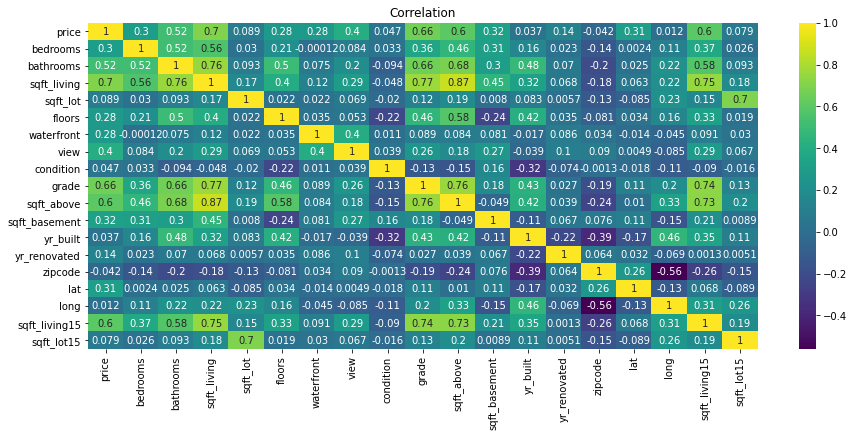

(3599, 5)
(3599, 5)
(10799, 5)


In [ ]:
# Load data
#data = np.loadtxt(os.path.join('Data', 'house_prices_data_training_data.txt'), delimiter=',')
#X = data[:, :2]
#y = data[:, 2]
#m = y.size
# Read comma separated data
data = pd.read_csv("/content/Data/house_prices_data_training_data (1).csv")
#data.drop(['id','date'], axis=1)
data=data.replace('NaN',0)
data=data.replace(inf,0)
#data = data.astype(int)
#data = np.loadtxt(os.path.join('Data', 'house_prices_data_training_data 2.csv'), delimiter=',')
data=data.drop(['id','date'],axis=1)


print("data shape", data.shape)
plt.figure(figsize=(15,6))
plt.title('Correlation')
sns.heatmap(data.corr(),annot=True,cmap='viridis',linecolor='white')
plt.show()
data=data.drop(columns =['bedrooms','sqft_lot','floors','waterfront','view','condition',
                        'sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_lot15'])

train, validate, test = \
              np.split(data.sample(frac=1, random_state=4), 
                       [int(.6*len(data)), int(.8*len(data))])

Xt, yt = train.iloc[:,1:], train.iloc[:, 0]
Xcv, ycv = validate.iloc[1:,1:], validate.iloc[1:, 0]
Xtest, ytest = test.iloc[1:,1:], test.iloc[1:, 0]


mt = yt.size  # number of training examples
mcv = ycv.size
mtest = ytest.size

print(Xt.shape)
print(Xtest.shape)
print(Xcv.shape)



In [ ]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
   
    # ================================================================
    return X_norm, mu, sigma

Execute the next cell to run the implemented `featureNormalize` function.

In [ ]:
?np.std

In [ ]:
# call featureNormalize on the loaded data
X_normt, mut, sigmat = featureNormalize(Xt)
X_normcv, mucv, sigmacv = featureNormalize(Xcv)
X_normtest, mutest, sigmatest = featureNormalize(Xtest)


print('Computed mean for trained data:', mut)
print('Computed standard deviation for trained data:', sigmat)

Computed mean: bathrooms           2.057366
sqft_living      2053.345402
grade               7.592740
sqft_above       1753.288360
sqft_living15    1975.744050
dtype: float64
Computed standard deviation: bathrooms          0.753013
sqft_living      896.570429
grade              1.163735
sqft_above       805.318036
sqft_living15    675.231131
dtype: float64


After the `featureNormalize` function is tested, we now add the intercept term to `X_norm`:

In [ ]:
# Add intercept term to X
Xt = np.concatenate([np.ones((mt, 1)), X_normt], axis=1)
Xcv = np.concatenate([np.ones((mcv, 1)), X_normcv], axis=1)
Xtest = np.concatenate([np.ones((mtest, 1)), X_normtest], axis=1)



<a id="section5"></a>
### 3.2 Gradient Descent

Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update
rule remain unchanged. 

You should complete the code for the functions `computeCostMulti` and `gradientDescentMulti` to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.
Make sure your code supports any number of features and is well-vectorized.
You can use the `shape` property of `numpy` arrays to find out how many features are present in the dataset.

<div class="alert alert-block alert-warning">
**Implementation Note:** In the multivariate case, the cost function can
also be written in the following vectorized form:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

where 

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

the vectorized version is efficient when you are working with numerical computing tools like `numpy`. If you are an expert with matrix operations, you can prove to yourself that the two forms are equivalent.
</div>

<a id="computeCostMulti"></a>

In [ ]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    # ==================================================================
    return J


In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        hypothesis=0
        
        
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

In [ ]:

# Choose some alpha value - change this
print(Xt)
alpha = 0.01
num_iters = 400
# init theta and run gradient descent for training data to get theta with min J cost 


theta1 = np.zeros(2) #1 degree polynomial
theta1cnvrg, Jtrain1 = gradientDescentMulti(Xt[:,0:2], yt, theta1, alpha, num_iters)
print(Jtrain1[num_iters-1])

theta2 = np.zeros(3) #2 degree polynomial
theta2cnvrg, Jtrain2 = gradientDescentMulti(Xt[:,0:3], yt, theta2, alpha, num_iters)
print(Jtrain2[num_iters-1])

theta3 = np.zeros(4) #3 degree polynomial
theta3cnvrg, Jtrain3 = gradientDescentMulti(Xt[:,0:4], yt, theta3, alpha, num_iters)
print(Jtrain3[num_iters-1])

theta4 = np.zeros(5) #4 degree polynomial
theta4cnvrg, Jtrain4 = gradientDescentMulti(Xt[:,0:5], yt, theta4, alpha, num_iters)
print(Jtrain4[num_iters-1])

theta5 = np.zeros(6) #5 degree polynomial
theta5cnvrg, Jtrain5 = gradientDescentMulti(Xt[:,0:6], yt, theta5, alpha, num_iters)
print(Jtrain5[num_iters-1])

# Plot the convergence graph
#pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
#pyplot.xlabel('Number of iterations')
#pyplot.ylabel('Cost J')

# Display the gradient descent's result
#print('theta computed from gradient descent: {:s}'.format(str(theta)))


[[ 1.          1.91581577  1.83103808  1.20926107  2.41111158  3.23482708]
 [ 1.          0.58781689  1.69161791  0.34995922  0.80305123  1.72423322]
 [ 1.          0.25581717  0.79932884  0.34995922 -0.22759749  0.4950245 ]
 ...
 [ 1.         -0.07618255 -0.32718612 -0.50934264 -0.72429566 -0.18622372]
 [ 1.          0.25581717 -0.96294209  1.20926107 -0.81121784 -0.80823295]
 [ 1.         -0.40818226 -0.8848668  -0.50934264 -0.61253857 -0.97114013]]
46330516909.25441
33261726840.99131
29951496225.601597
30318107079.301186
30084136953.526196


In [ ]:
# validate data with the theta calc in training 

Jcost1= computeCostMulti(Xcv[:,0:2], ycv, theta1cnvrg)
print(Jcost1)
Jcost2= computeCostMulti(Xcv[:,0:3], ycv, theta2cnvrg)
print(Jcost2)
Jcost3= computeCostMulti(Xcv[:,0:4], ycv, theta3cnvrg)
print(Jcost3)
Jcost4= computeCostMulti(Xcv[:,0:5], ycv, theta4cnvrg)
print(Jcost4)
Jcost5= computeCostMulti(Xcv[:,0:6], ycv, theta5cnvrg)
print(Jcost5)

49583316278.432495
35167193067.752686
32567727851.294125
32915278234.965874
32753387016.125584


In [ ]:
#for testing with the lowest degree error and thetas t

J_test= computeCostMulti(Xtest[:,0:6], ytest, theta5cnvrg)
print("test cost:",J_test)



test cost: 35990979499.20615


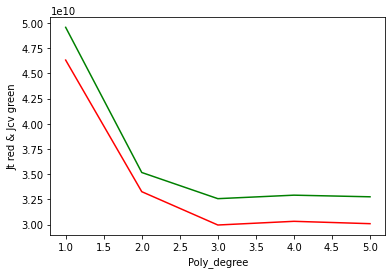

In [ ]:
#Model_evaluation
#Plotting_Jtrain_&_Jcv_against_the_degree
degrees = [1, 2, 3, 4, 5]
Jtarray = [Jtrain1[num_iters-1], Jtrain2[num_iters-1],Jtrain3[num_iters-1],Jtrain4[num_iters-1],Jtrain5[num_iters-1]]
Jcvarray = [J1, J2, J3, J4, J5]

plt.xlabel('Poly_degree')
plt.ylabel('Jt red & Jcv green')
plt.plot(degrees,Jtarray , 'r') 
plt.plot(degrees, Jcvarray, 'g') 

#as shown in the plot the best degree found was 18
plt.show()